In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy import signal


This should be he nyquest butter filter for the low pass part 


<ipython-input-93-8053c2cc394b>:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 10_000)


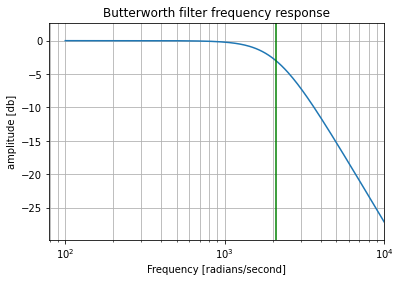

In [93]:
print("This should be he nyquest butter filter for the low pass part ")

b, a = signal.butter(2, 2100, 'low', analog = True)
w, h = signal.freqs(b, a) # here is the issue, idk what a & b are....
plt.semilogx(w, 20 *np.log10(abs(h)))
plt.title("Butterworth filter frequency response")
plt.xlabel('Frequency [radians/second]')
plt.ylabel('amplitude [db]')
plt.xlim(0, 10_000)
plt.margins(0, 0.1)
plt.grid(which ='both', axis = 'both')
plt.axvline(2098.37, color = 'green') # cutoff frequency
plt.show()


This should be he nyquest butter filter for the high pass part 


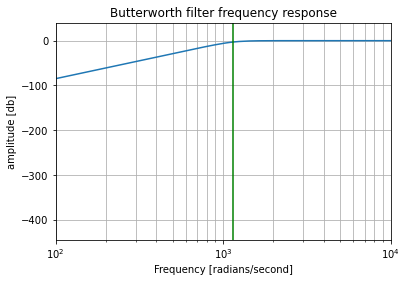

In [94]:
print("This should be he nyquest butter filter for the high pass part ")

b, a = signal.butter(4, 1147.67, 'high', analog = True) 
# butter(g, cf, low/high, analog=true?)
# g = amplitude 
# cf = corder frequency / drop off 
w, h = signal.freqs(b, a) 
plt.semilogx(w, 20 *np.log10(abs(h)))
plt.title("Butterworth filter frequency response")
plt.xlabel('Frequency [radians/second]')
plt.ylabel('amplitude [db]')
plt.margins(0, 0.1)
plt.xlim(100, 10_000)
plt.grid(which ='both', axis = 'both')
plt.axvline(1147.63, color = 'green') # cutoff frequency
# plt.axvline(500, color = 'green') # cutoff frequency
plt.show()


In [95]:
print("Lets test out the LPF ")


def lpf_ba(x, b, a):
    y = np.zeros(len(x))
    order = len(b)
    y[0] = 0
    y[1] = 0
    for i in range(order, len(x)):
        for j in range(0, order):
            y[i] = y[i] + x[i-j]*b[j]
        for j in range(1, order):
            y[i] = y[i] - y[i-j]*a[j]
        return y

# print("ok so that isnt working, how else can i print it?")

def lpf2(x, alpha):
    y = np.zeros(len(x))
    y[0] = 0
    y[1] = 0
    for i in range(2, len(x)):
        y[i] = alpha**2*x[i] + 2*(1-alpha)*y[i-1] - (1-alpha)**2 * y[i-2]
    return[y]
    


Lets test out the LPF 


In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

def lpf2(x, alpha):
    y = np.zeros(len(x))
    y[0] = 0
    y[1] = 0
    for i in range(2, len(x)):
        y[i] = alpha**2*x[i] + 2*(1-alpha)*y[i-1] - (1-alpha)**2 * y[i-2]
    return y

def lpf_ba(x, b, a):
    y = np.zeros(len(x))
    order = len(b)
    y[0] = 0
    y[1] = 0
    for i in range(order,len(x)):
        for j in range(0,order):
            y[i] = y[i] + x[i-j]*b[j]
        for j in range(1,order):
            y[i] = y[i] - y[i-j]*a[j]
    return y


# def lpf_test(x):
#     y = np.zeros(len(x))
#     y[0] = 0
#     y[1] = 0
#     for i in range(2,len(x)):
#         y[i] = 0.29289322*x[i] + 0.58578644*x[i-1] + 0.29289322*x[i-2] + 1.71572875e-01 * y[i-2]
#     return y

Text(0.5, 0, '$f/f_\\mathrm{Nyquist}$')

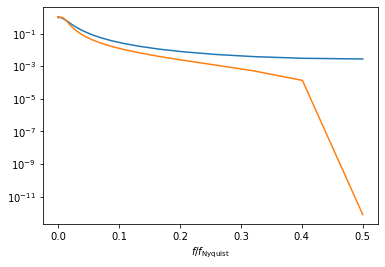

In [97]:
%matplotlib inline

sp = 100_000 #sampling rate ?
ALPHA = 0.1

t = np.linspace(0,1, sp)

b, a = scipy.signal.butter(2, 0.02295)
# b, a = scipy.signal.butter(4, 0.0075)
# b, a = scipy.signal.butter(2, 0.0075)

N=50
freqs = np.geomspace(1,sp/2,N)
resp, resp2 = np.zeros(N), np.zeros(N)
for i,f in enumerate(freqs):
    y = lpf2(np.sin(2*np.pi*f*t), ALPHA)
    resp[i] = np.sqrt(np.mean(y[len(y)//2::]**2))*np.sqrt(2)
    
    y = lpf_ba(np.sin(2*np.pi*f*t), b, a)
    resp2[i] = np.sqrt(np.mean(y[len(y)//2::]**2))*np.sqrt(2)
    
#def h(a, omega):
#    return a**2/np.sqrt(1+4*(1-a)**2+(1-a)**4 + 2*(-2*(1-a) + (1-a)**2 - 2*(1-a)**3)*np.cos(omega))
    
plt.semilogy(freqs/sp, resp)
plt.semilogy(freqs/sp, resp2)
#plt.semilogy(freqs/NP, h(ALPHA, freqs/NP))
plt.xlabel("$f/f_\\mathrm{Nyquist}$")

In [98]:
t = np.linspace(0,1,100_000)
y = np.cos(2*np.pi*t * 1000) + np.sin(2*np.pi*t * 8)

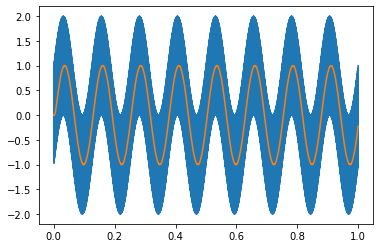

In [99]:
%matplotlib inline

b, a = scipy.signal.butter(2, 0.001)

plt.plot(t,y)
#plt.plot(t, scipy.signal.lfilter(b, a, y))
plt.plot(t,lpf_ba(y, b, a))
#plt.ylim(-2**14,2**14)

In [100]:
import scipy.signal

# Define the cutoff frequencies
f_low = 1147.63
f_high = 2098.37
frequency = 100_000  # Corrected the comma to an underscore

# Calculate center frequency and bandwidth
f_c = 1623
B = f_high - f_low

# low & high frequency critical fractions
cfc_low = f_low / (frequency / 2)
cfc_high = f_high / (frequency / 2)

print(cfc_high, " , ", cfc_low)  # Corrected the syntax for printing

# Choose the filter order (e.g., n=2 or n=4)
n = 4


# Design Butterworth bandpass filter
b, a = scipy.signal.butter(n, [f_low, f_high], btype='band', analog=False, fs=frequency)

# 'b' and 'a' are the filter coefficients that you can use in the filter function


0.041967399999999995  ,  0.022952600000000004


In [101]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Define the cutoff frequencies
f_low = 1147.63
f_high = 2098.37

# Calculate the center frequency for the bandpass filter
center_frequency = 1623

# Define the time array
t = np.linspace(0, 1, 1000)

# Adjust the frequencies of the cosine and sine waves
y = np.cos(2 * np.pi * t * center_frequency) + np.sin(2 * np.pi * t * (center_frequency / 8))

# # Plot the signal
# plt.plot(t, y)
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.title('Signal with Center Frequency 1623 Hz')
# plt.show()


In [102]:
def lpf2(x, alpha):
    y = np.zeros(len(x))
    y[0] = 0
    y[1] = 0
    for i in range(2,len(x)):
        y[i] = alpha**2*x[i] + 2*(1-alpha)*y[i-1] - (1-alpha)**2 * y[i-2]
    return y


def lpf_ba(x, b, a):
    y = np.zeros(len(x))
    order = len(b)
    y[0] = 0
    y[1] = 0
    for i in range(order,len(x)):
        for j in range(0,order):
            y[i] = y[i] + x[i-j]*b[j]
        for j in range(1,order):
            y[i] = y[i] - y[i-j]*a[j]
    return y

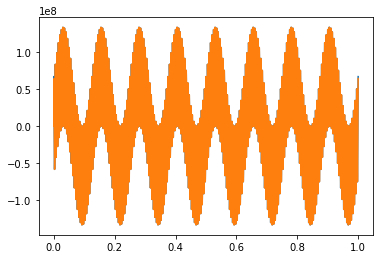

In [107]:
%matplotlib inline

b, a = scipy.signal.butter(2, 0.022952600000000004)

plt.plot(t,y)
#plt.plot(t, scipy.signal.lfilter(b, a, y))
plt.plot(t,lpf_ba(y, b, a))
#plt.ylim(-2**14,2**14)



In [104]:
def lpf_test(x):
    y = np.zeros(len(x))
    y[0] = 0
    y[1] = 0
    for i in range(2,len(x)):
        y[i] = 0.4096*x[i] + 0.7774*x[i-1] + 0.3698*x[i-2] + 1.71572875e-01 * y[i-2]
    return y

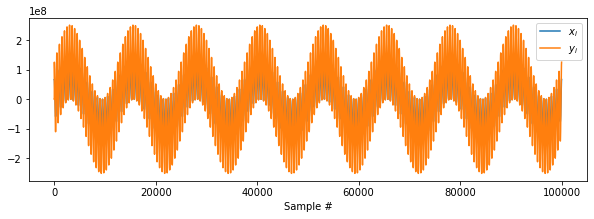

In [105]:
%matplotlib inline

plt.figure(figsize=(10,3))

t = np.linspace(0,1,100_000)
y = ((np.cos(2*np.pi*t * 200) + np.sin(2*np.pi*t * 8))*(2**26 - 1)).astype(int)

plt.plot(y, label='$x_i$')
#plt.plot(t, scipy.signal.lfilter(b, a, y))
plt.plot(lpf_test(y),label='$y_i$')
plt.legend()
#plt.ylim(-2**14,2**14)
plt.xlabel("Sample #")
plt.savefig("testFilter.svg", bbox_inches='tight')

In [110]:
n_bits = 12


b, a = scipy.signal.butter(2, 0.022952600000000004)
print((b*2**n_bits).astype(int))
print((a*2**n_bits).astype(int))

[ 5 10  5]
[ 4096 -7774  3698]
